In [1]:
import pandas as pd
import numpy as np
from linear_regression_utils import linear_regression_model, predict, plt_gradients, cost_function
from helper_functions import plot_learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_theme()

In [2]:
salary = pd.read_csv("dataset/Experience-Salary.csv")
salary

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
995,22.161741,24.666502
996,32.266497,24.160270
997,17.039030,19.903797
998,25.222124,21.974413


In [3]:
salary.corr()["salary(in thousands)"]

exp(in months)          0.810969
salary(in thousands)    1.000000
Name: salary(in thousands), dtype: float64

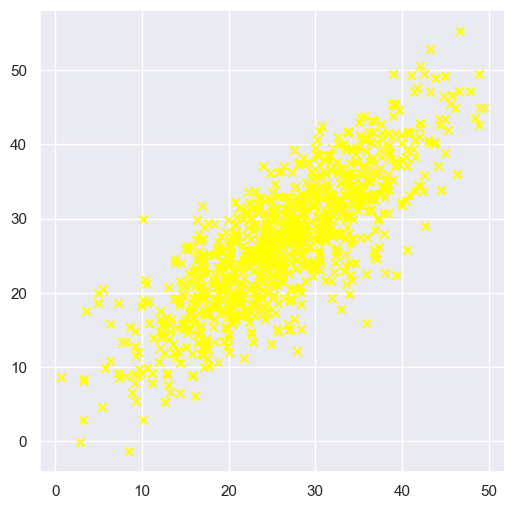

In [4]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(data=salary,x="exp(in months)", y="salary(in thousands)", color="yellow", marker="x", label="salary(in thousands)")

In [5]:
X = salary.iloc[:, :1]
X["Job title"] = salary.iloc[:, :1]
y = salary.iloc[:, -1]

In [6]:
X

,exp(in months)
0,18.290293
1,17.023407
2,26.343613
3,19.105834
4,27.742516
...,...
995,22.161741
996,32.266497
997,17.039030
998,25.222124


In [7]:
y

0      16.521825
1      11.666234
2      23.167255
3      20.877145
4      23.166236
         ...    
995    24.666502
996    24.160270
997    19.903797
998    21.974413
999    19.634787
Name: salary(in thousands), Length: 1000, dtype: float64

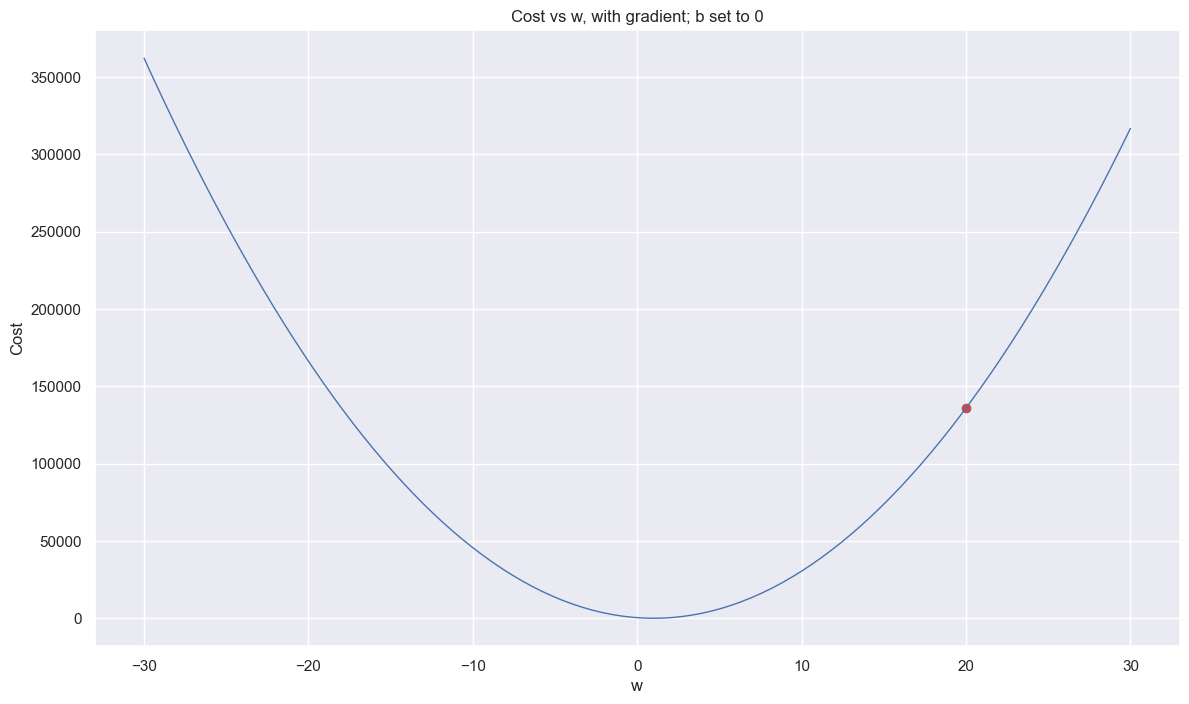

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
initial_w = np.array([20.0, 20.0])
initial_b = 0.0
# plt_gradients(X_train, y_train, cost_function, w_start=-30, w_end=30, w_step=100, b_value=0, w_initial=initial_w)

In [9]:
# Simple gradient descent to find w and b
result = linear_regression_model(X_train, y_train, X_test, y_test, initial_w=initial_w, initial_b=initial_b, learning_rate=0.00265, print_cost=True, num_iterations=50000)
new_w = result["w"]
new_b = result["b"]

Initial weights: [20.]
Cost for iterate no 100: 129272.37780236086 with w = [-17.47699939] and b = -1.1461782064703971
Cost for iterate no 200: 122925.71075081053 with w = [-17.02209446] and b = -0.9874592626066916
Cost for iterate no 300: 116890.66726721138 with w = [-16.57849066] and b = -0.8329004698515541
Cost for iterate no 400: 111151.94652491927 with w = [-16.14590726] and b = -0.6823927550534459
Cost for iterate no 500: 105694.99897329323 with w = [-15.72407048] and b = -0.5358299056075109
Cost for iterate no 600: 100505.98944976773 with w = [-15.31271337] and b = -0.3931084944148744
Cost for iterate no 700: 95571.76210315115 with w = [-14.91157559] and b = -0.2541278068109929
Cost for iterate no 800: 90879.80703917786 with w = [-14.52040326] and b = -0.11878976941131913
Cost for iterate no 900: 86418.22860382064 with w = [-14.13894883] and b = 0.013001119175853892
Cost for iterate no 1000: 82175.71522385771 with w = [-13.76697089] and b = 0.1413378558186582
Cost for iterate no

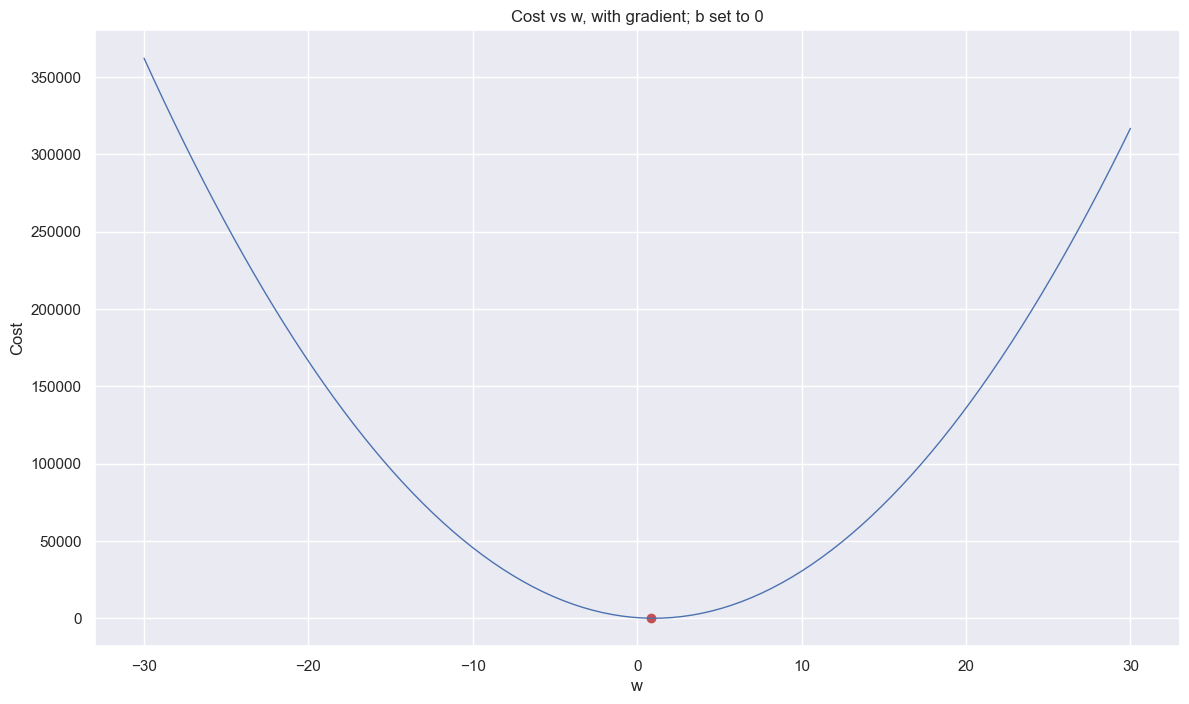

In [10]:
plt_gradients(X_train, y_train, cost_function, w_start=-30, w_end=30, w_step=100, b_value=0, w_initial=new_w)

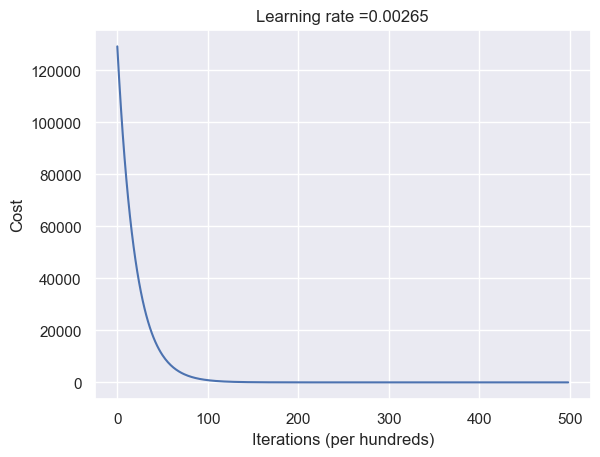

In [11]:
plot_learning_curve(result["cost_history"], result["learning_rate"])

In [12]:
print(f"Coefficients: {new_w}")
print(f"Intercept: {new_b}")
print(f"Form of Simple Linear Regression: f(x) = {new_w[0]} * x + {new_b}")

Coefficients: [0.83367313]
Intercept: 4.911170536158946
Form of Simple Linear Regression: f(x) = 0.833673133889933 * x + 4.911170536158946


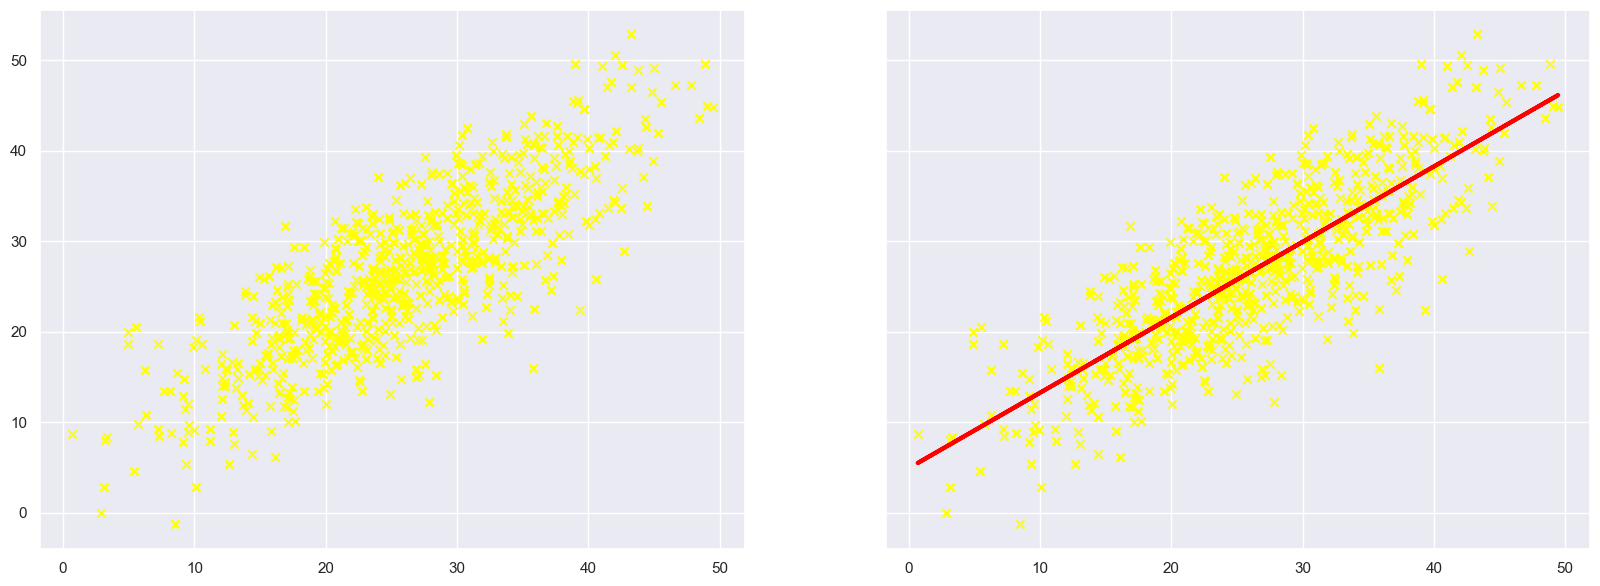

In [13]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20, 7))
ax[0].scatter(x=X_train, y=y_train, c="yellow", marker="x")
ax[1].scatter(x=X_train, y=y_train, c="yellow", marker="x")
ax[1].plot(X_train, predict(X_train, new_w, new_b), linewidth=3, color="red")
plt.show()

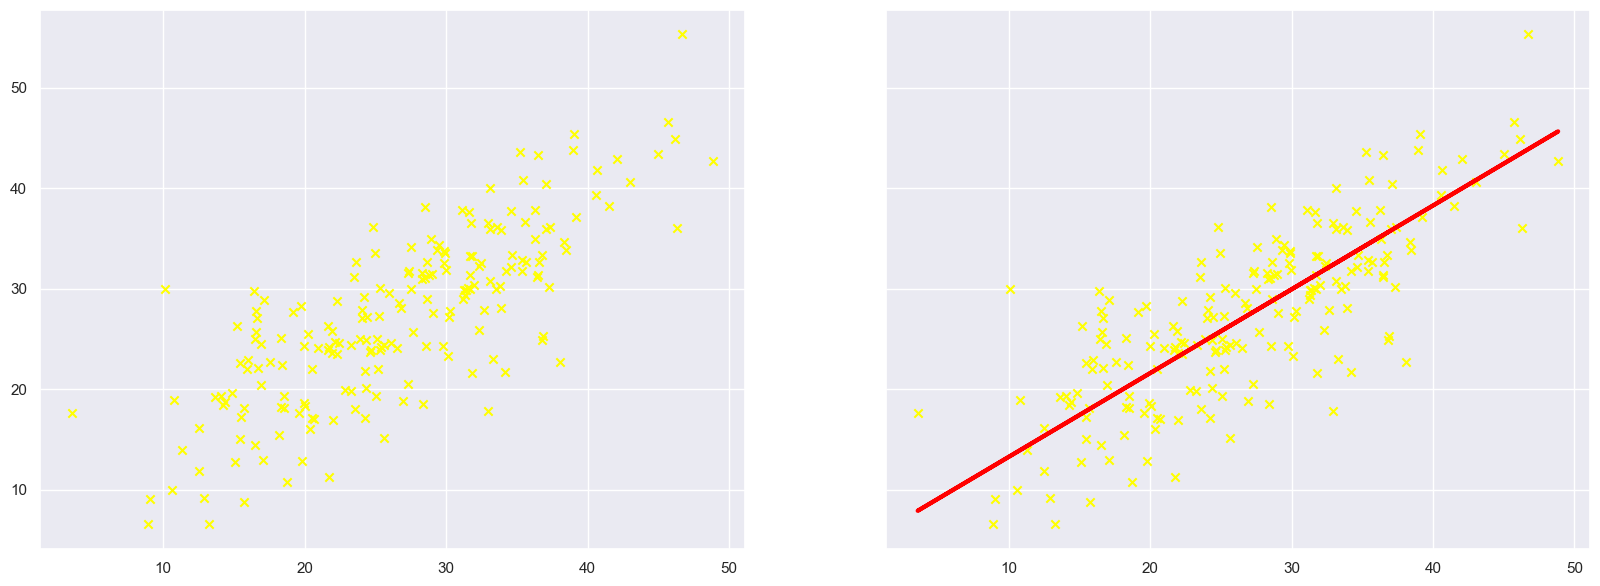

In [14]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20, 7))
ax[0].scatter(x=X_test, y=y_test, c="yellow", marker="x")
ax[1].scatter(x=X_test, y=y_test, c="yellow", marker="x")
ax[1].plot(X_test, predict(X_test, new_w, new_b), linewidth=3, color="red")
plt.show()